# Shapefiles

The [shapefile](https://en.wikipedia.org/wiki/Shapefile) is a format for representing the geographic location of geometric features, such as wells, rivers, and lakes. These features are represented as points, lines, and polygons.

You can find shapefiles online. For example, the [U.S. Census Bureau](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html) maintains shapefiles for the boundaries of states, counties, and congressional districts in the United States. [Esri](https://www.arcgis.com/home/item.html?id=3864c63872d84aec91933618e3815dd2) (the company that created the shapefile format) maintains a set of shapefiles for the countries of the world.

Shapefiles for the counties in the U.S. are available on JupyterHub in the `/data/cb_2016_us_county_20m/` directory.

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
!ls /data/cb_2016_us_county_20m/

cb_2016_us_county_20m.cpg  cb_2016_us_county_20m.shp.ea.iso.xml
cb_2016_us_county_20m.dbf  cb_2016_us_county_20m.shp.iso.xml
cb_2016_us_county_20m.prj  cb_2016_us_county_20m.shp.xml
cb_2016_us_county_20m.shp  cb_2016_us_county_20m.shx


Notice that "shapefile" is somewhat of a misnomer, as the format refers not to a single file but a collection of files. The main files are:

- `.shp` - shape format, which stores the geometric objects
- `.shx` - shape index format, which indexes the objects to make them quickly searchable
- `.dbf` - attribute format, which stores attributes for each object
- `.prj` - projection format

To read in a shapefile using Basemap, we first set up the map, then call the `.readshapefile()` method, which takes two arguments: (1) the stem of the shapefiles (without the file extension) and (2) a name for the field that will store the attributes (you can pick any name you like, but try to be descriptive).

(3220,
 5,
 [-179.174265, 17.913769, 0.0, 0.0],
 [179.773922, 71.352561, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7facfdbff240>)

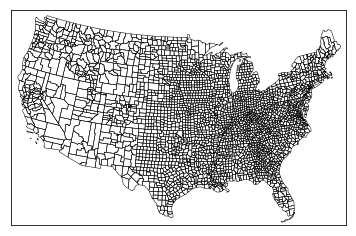

In [6]:
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
            projection="lcc", lat_1=33, lat_2=45, lon_0=-95)
m.readshapefile("/data/cb_2016_us_county_20m/cb_2016_us_county_20m", "counties")

Since we called the field `counties`, we can get a list of all of the shape vertices with `m.counties` and a list of the attributes of each shape with `m.counties_info`.

In [4]:
m.counties[0]

[(3531866.621925848, 1655839.0864853766),
 (3580522.0010944083, 1659049.2348165205),
 (3581985.550166872, 1634619.5025175586),
 (3561693.6681118207, 1632896.544474245),
 (3547282.465333389, 1631361.0004234044),
 (3541484.2400202705, 1636811.727560739),
 (3537238.2122619664, 1640321.0676776432),
 (3531144.5444820845, 1639870.310060192),
 (3531866.621925848, 1655839.0864853766)]

In [5]:
m.counties_info[0]

{'AFFGEOID': '0500000US39131',
 'ALAND': 1140324458,
 'AWATER': 9567612,
 'COUNTYFP': '131',
 'COUNTYNS': '01074078',
 'GEOID': '39131',
 'LSAD': '06',
 'NAME': 'Pike',
 'RINGNUM': 1,
 'SHAPENUM': 1,
 'STATEFP': '39'}

In [6]:
cancer_data = pd.read_csv("/data/lung_cancer.csv", 
                          skiprows=8, skipfooter=22,
                          encoding="ISO-8859-1")
cancer_data.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,County,FIPS,"Age-Adjusted Incidence Rate() - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0,74.5,74.3,74.7,113972,falling,-3.2,-3.7,-2.8
1,"Union County, Florida(6,10)",12125,294.7,240,358,31,stable,9.0,-8.4,29.7
2,"Covington City, Virginia(6,10)",51580,210.7,147.3,293.6,7,stable,12.2,-38.1,103.3
3,"McCreary County, Kentucky(7,9)",21147,203.2,163.5,249.8,20,stable,7.8,-11.3,31.0
4,"Floyd County, Kentucky(7,9)",21071,202.2,175.1,232.4,44,stable,-9.1,-19.5,2.5


In [7]:
counties_data = pd.DataFrame(m.counties_info)

# Add the vertices of the polygon that make up each county to the data frame.
counties_data["VERTICES"] = m.counties
counties_data.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,RINGNUM,SHAPENUM,STATEFP,VERTICES
0,0500000US39131,1140324458,9567612,131,01074078,39131,06,Pike,1,1,39,"[(3531866.621925848, 1655839.0864853766), (358..."
1,0500000US46003,1834813753,11201379,003,01266983,46003,06,Aurora,1,2,46,"[(2232228.4451421956, 2122910.636741191), (227..."
2,0500000US55035,1652211310,18848512,035,01581077,55035,06,Eau Claire,1,3,55,"[(2800381.9430626254, 2223670.0340491533), (28..."
3,0500000US72145,118766803,57805868,145,01804553,72145,13,Vega Baja,1,4,72,"[(5669304.648897658, -261216.56241577445), (56..."
4,0500000US48259,1715747531,1496797,259,01383915,48259,06,Kendall,1,5,48,"[(2157261.865463989, 594400.377370757), (21893..."


We can join these two data on the **FIPS code**, a unique ID that is assigned to every county in the U.S. This code is stored in `FIPS` in the cancer data and `GEOID` in the counties data.

In [8]:
counties_data["GEOID"] = counties_data["GEOID"].astype(int)

In [9]:
# WRITE THE APPROPRIATE CODE TO JOIN THE TWO DATA FRAMES,
# STORE THE RESULT IN A DATA FRAME CALLED data

data = counties_data.merge(cancer_data, left_on=["GEOID"], right_on=[" FIPS"])

Now we have the vertices of each county and the lung cancer rates, all in one data frame. However, lung cancer rates for some counties are missing and currently represented as symbols. We need to remove these counties from the data frame and cast the rest to a numeric type.

In [10]:
# Filter out the observations where the incidence is not a number
data["incidence"] = pd.to_numeric(data["Age-Adjusted Incidence Rate() - cases per 100,000"],
                                  errors="coerce")
data = data[~data["incidence"].isnull()]

Now we are ready to make the choropleth. 

Store the `mpl.patches.Polygon` for each county in a `mpl.collections.PatchCollection` object. Then, we set the color of each polygon based on the lung cancer incidence. This requires two things:

- a [normalization](https://matplotlib.org/users/colormapnorms.html) that maps the values of the variable to [0, 1]. You can use `mpl.colors.Normalize()` for linear normalization or `mpl.colors.LogNorm()` for logarithmic normalization. 
- a [color map](https://matplotlib.org/examples/color/colormaps_reference.html), that maps numbers in [0, 1] to a color. Use `plt.get_cmap()` to get a particular colormap.

To actually set the color, we call the `.set_facecolor()` method of the `PatchCollection`.

Next, we add the PatchCollection to our `Axes` object to create the choropleth.

Finally, we add a legend by creating a `mpl.cm.ScalarMappable` object with the same normalization and color map, passing it the data used to construct the scale with `.set_array()`, and then creating a color bar (`plt.colorbar`) out of this `ScalarMappable`.

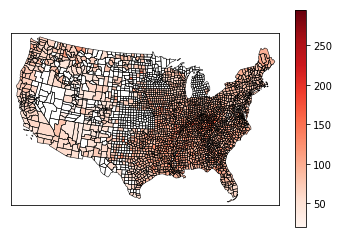

In [19]:
# CREATE PatchCollection OF Polygons CONSTRUCTED FROM data["VERTICES"].
pc = mpl.collections.PatchCollection(
    [mpl.patches.Polygon(county) for county in data["VERTICES"]])

# SPECIFY NORMALIZATION AND COLOR MAP.
norm = mpl.colors.Normalize()
cmap = plt.get_cmap("Reds")
cmap(norm(data["incidence"]))

# SET THE FACE COLOR OF EACH POLYGON.
pc.set_facecolor(cmap(norm(data["incidence"])))

# MAKE THE PLOTS.
m.readshapefile("/data/cb_2016_us_county_20m/cb_2016_us_county_20m", "counties")
ax = plt.gca()
ax.add_collection(pc)

# ADD A LEGEND.
mapper = mpl.cm.ScalarMappable(norm, cmap)
mapper.set_array(data["incidence"])
plt.colorbar(mapper)